## NFL Points vs Yards per Game clustering

This is a sandbox notebook to test out some sci-kit learn clustering algorithms on NFL scoring data. We want to see if we can separate teams into "tiers" based on plots of their defensive and ofensive points-per-game (PPG) and yards-per-game (YPG). We collected the data by scraping [Pro-Football Reference](https://www.pro-football-reference.com) with our [scraper](https://github.com/andrewbowen19/football-stats-analysis/blob/main/src/scraper.py) script contained in this repo.

#### Some algorithms to try out:
- [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
- Affinity Propagation
- DBSCAN

In [95]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
from sklearn.cluster import KMeans


In [57]:
# Would like to run a k-means clustering on PPG-YPG
csv_path = os.path.join("..", "data", "nfl-stats-by-season.csv")
df = pd.read_csv(csv_path)

df.columns = ['Tm', 'W', 'L', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS',
              'OSRS', 'DSRS', 'Rk', 'G', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD',
              'Cmp', 'Att', 'Yds_opp', 'Season']

df.dropna(axis=0, how='any', inplace=True)

In [58]:
# Calculating YPG and PPG from season totals
df['PPG'] = df['PF'] / df['G']
df['YPG'] = df['Yds'] / df['G']

df['PPG_opp'] = df['PA'] / df['G']
df['YPG_opp'] = df['Yds_opp'] / df['G'] 

df.head()


,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,...,FL,1stD,Cmp,Att,Yds_opp,Season,PPG,YPG,PPG_opp,YPG_opp
2,Miami Dolphins,9,8,0.529,341,373,-32,-1.9,-0.8,-2.7,...,12.0,325.0,404.0,615.0,5738.0,2021,20.058824,307.000000,21.941176,337.529412
3,New York Jets,4,13,0.235,310,504,-194,-11.4,1.0,-10.4,...,7.0,310.0,357.0,603.0,6760.0,2021,18.235294,306.352941,29.647059,397.647059
6,Cleveland Browns,8,9,0.471,349,371,-22,-1.3,0.0,-1.3,...,8.0,342.0,320.0,520.0,5296.0,2021,20.529412,340.647059,21.823529,311.529412
7,Baltimore Ravens,8,9,0.471,387,392,-5,-0.3,0.0,-0.3,...,8.0,394.0,396.0,611.0,6178.0,2021,22.764706,378.823529,23.058824,363.411765
9,Indianapolis Colts,9,8,0.529,451,365,86,5.1,-0.6,4.4,...,11.0,354.0,324.0,521.0,5834.0,2021,26.529412,347.117647,21.470588,343.176471


In [59]:
# Plotting PPG vs YPG (Offensive)

px.scatter(df, x='YPG', y='PPG', color='Season',  hover_data=['Tm', 'Season'])

In [60]:
# Plotting opponent PPG vs YpG
px.scatter(df, x='YPG_opp', y='PPG_opp', color='Season',  hover_data=['Tm', 'Season'])

### Running [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means) clustering

using `scikit-learn`'s built-in kmeans algorithm to cluster teams based on their YpG and PPG.

In [67]:
# Fitting K-means to YPG
data = df[['YPG', 'PPG']]
kmeans_off = KMeans(n_clusters=4, random_state=0).fit(data)

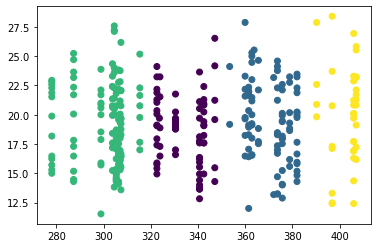

In [68]:
plt.scatter(df.YPG, df.PPG, c=kmeans_off.labels_, )

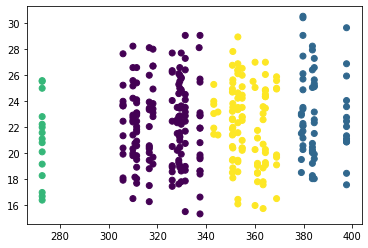

In [71]:
# Plotting defensive measures -- colored by cluster

data = df[['YPG_opp', 'PPG_opp']]
kmeans_def = KMeans(n_clusters=4, random_state=0).fit(data)

plt.scatter(data.YPG_opp, data.PPG_opp, c=kmeans_def.labels_)

### Affinity Propagation
Trying out the built-in [Affinity Propagation](https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation) module from `scikit-learn`.

In [111]:
from sklearn.cluster import AffinityPropagation

In [112]:
data_off = df[['YPG', 'PPG']]
data_def = df[['YPG_opp', 'PPG_opp']]


ap = AffinityPropagation(verbose=True).fit(data_off)

Converged after 83 iterations.


In [115]:
n_clusters = len(np.unique(ap.labels_))

print(f"Affinity Propagation produced {n_clusters}.")

array([0, 1, 2, 3, 4, 5, 6])

Text(0, 0.5, 'PPG')

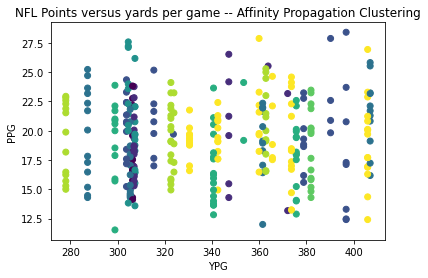

In [117]:
plt.scatter(data_off['YPG'], data_off['PPG'], c=ap.labels_)
plt.title("NFL Points versus yards per game -- Affinity Propagation Clustering")
plt.xlabel("YPG")
plt.ylabel("PPG")

Converged after 57 iterations.


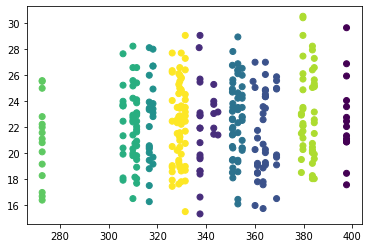

In [116]:
# Doing the same for defensive stats -- opponent YPG and PPG
ap = AffinityPropagation(verbose=True).fit(data_def)

plt.scatter(data_def['YPG_opp'], data_def['PPG_opp'], c=ap.labels_)
plt.title("NFL Opponent Points versus yards per game -- Affinity Propagation")
plt.xlabel("Opp YPG")
plt.ylabel("Opp PPG")